# 13. Neural Networks (MLP in Scikit-learn)

**Purpose:** Learn and revise **Multilayer Perceptron (MLP)** in Scikit-learn.

---

## What is an MLP?

**MLPClassifier** / **MLPRegressor** are feedforward neural networks with one or more **hidden layers**. Each layer applies weights and an activation (ReLU, tanh, logistic). The output layer uses softmax (classification) or identity (regression). Training minimizes loss via gradient descent (e.g. Adam).

**Key idea:** **hidden_layer_sizes** defines the network (e.g. (100, 50) = two hidden layers). **Scale features**; tune **learning_rate**, **max_iter**, and **alpha** (L2 regularization).

## Concepts to Remember

| Concept | Description |
|--------|-------------|
| **hidden_layer_sizes** | Tuple of layer sizes, e.g. (64, 32). |
| **activation** | 'relu', 'tanh', 'logistic'; ReLU is default. |
| **solver** | 'adam' (default), 'sgd', 'lbfgs'. |
| **alpha** | L2 regularization; larger = less overfitting. |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
np.random.seed(42)
X = np.random.randn(300, 4)
y = (X[:, 0] * X[:, 1] + X[:, 2] > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [3]:
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation="relu", solver="adam", max_iter=500, random_state=42, alpha=0.01)
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Loss curve (last 5):", model.loss_curve_[-5:])
print(classification_report(y_test, y_pred))

Accuracy: 0.9833333333333333
Loss curve (last 5): [np.float64(0.015539701283971408), np.float64(0.015497144456304597), np.float64(0.015518266207391837), np.float64(0.01549377785423182), np.float64(0.015472340796377604)]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.97      0.98        29

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



/Users/fabio/Projects/learning2fly-sklearn/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


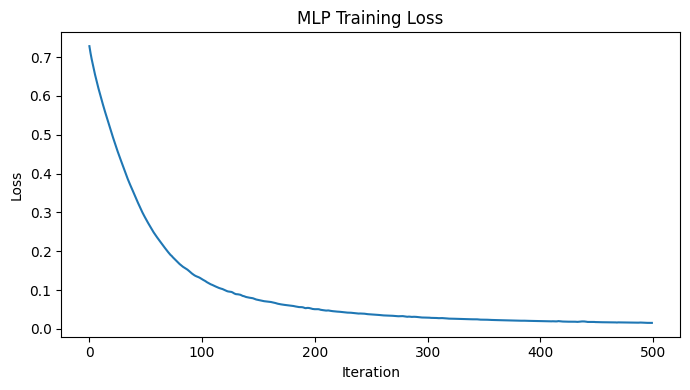

In [4]:
plt.figure(figsize=(7, 4))
plt.plot(model.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("MLP Training Loss")
plt.tight_layout()
plt.show()

## Key Takeaways

- **MLPClassifier** / **MLPRegressor**; **hidden_layer_sizes** and **max_iter**; **scale features**.
- **loss_curve_** shows training loss; use it to check convergence.
- For large problems consider PyTorch/TensorFlow; sklearn MLP is for small to medium tabular data.